# Kapitza's Inverted Pendulum

An inverted pendulum --- one where the rod points upward so that the bob is above the pivot --- is usually unstable. However, if the pivot is driven to oscillate up and down at a high frequency, the pendulum can be stabilized in the upward position. This system, called Kapitza's pendulum, is shown in the Figure below. We will solve its equation of motion and illustrate the stability of the pendulum.  
![Kapitza](source/Kapitza.png)

The Lagrangian of the system is given by (ignoring terms that do not depend on $\theta$ or $\dot{\theta}$):
\begin{equation*}
L = \frac{1}{2} m l^2 \dot{\theta}^2 - m l \sin\theta \, \dot{\theta} \, \dot{z} - m g l \cos\theta
\end{equation*}
Let us assume that the pivot is driven to move as $z(t) = A \cos \omega t$. The Euler-Lagrange equation for $\theta$ leads to:
\begin{equation*}
\ddot{\theta} = (\omega_0^2 - \alpha \omega^2 \cos \omega t) \sin\theta
\end{equation*}
where $\omega_0^2 \equiv g/l$ and $\alpha \equiv A/l$.

To solve this equation numerically, we first cast it into a set of first order ordinary differential equations (ODE). Let us define an auxilliary variable $\eta$ to be the time derivative of $\theta$, i.e., $\eta \equiv \dot{\theta}$, then we have:
\begin{align*}
\dot{\theta} &= \eta \\
\dot{\eta} &= (\omega_0^2 - \alpha \omega^2 \cos \omega t) \sin\theta
\end{align*}
We will solve these equations using the `odeint` function from the `scipy.integrate` module, as illustrated below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as intgr

We first have to define a function to calculate the time derivatives of the variables. All variables are stacked into an array `X`, which is the input to the function, besides time and other parameters.

In [2]:
def equations(X, t, alpha, omega):    # calculate time derivatives
    theta, eta = X    # parse variables
    d_theta = eta
    d_eta = (1 - alpha * omega**2 * np.cos(omega*t)) * np.sin(theta)
    return [d_theta, d_eta]    # assemble derivatives into an array

Now we choose some values for the parameters. We have set $\omega_0 = 1$ by rescaling time. In order for Kapitza's pendulum to be stable, the driving frequency $\omega$ must be large compared to $\omega_0$ (you can test this later by changing the value of $\omega$).

In [3]:
alpha = 0.1    # amplitude of pivot << 1
omega = 30.    # omega >> 1

theta0 = 0.1    # initial position
eta0 = 0.0    # initial speed

T = 10.    # total time to solve for
time = np.arange(0, T, 0.01)    # time points to evaluate solution at

sol = intgr.odeint(equations, [theta0, eta0], time, args=(alpha, omega))    # solve equations
theta = sol[:,0]    # theta is the first component of solution

We have solved the equations using the `odeint` function. Let us plot our result.

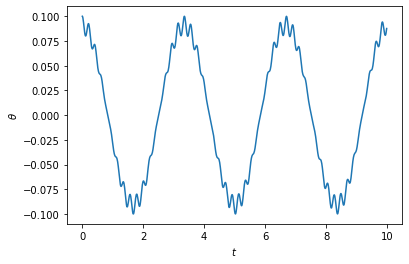

In [4]:
plt.figure()
plt.plot(time, theta)    # plot angle as a function of time
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.show()

The plot shows that the pendulum stays near the upright position, and is therefore stable! Notice that the motion apparently consists of a fast component (with the same frequency as the driving) and a slow component that oscillates around the upright position. If not for the high-frequency component that generates an "effective restoring force", the system would not have been stable. You can change the parameter $\omega$ and repeat the steps above to see when the system stops being stable.

Just for fun, we can make an animation of the pendulum using the solution we got.

In [5]:
import matplotlib.animation as anim

plt.rcParams["animation.html"] = "jshtml"
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlim(-1, 1)
ax.set_ylim(-0.5, 1.5)
ax.axis('off')
p0, = ax.plot([], [], '-')
p1, = ax.plot([], [], 'o')

def animate(t):
    Zt = alpha * np.cos(omega * time[t])
    Xt = np.sin(theta[t])
    Yt = np.cos(theta[t]) + Zt
    p0.set_data([Xt, 0], [Yt, Zt])
    p1.set_data([Xt], [Yt])

mov = anim.FuncAnimation(fig, animate, frames=len(time), interval=10)
plt.close()

In [6]:
mov

```{admonition} Exercise
:class: tip
**Solving the problem using Hamilton's equations**  
From the Lagrangian, you can derive the Hamiltonian for the inverted pendulum, then write down the equations of motion using Hamilton's equations. These equations will already be first order ODE's. Solve them numerically and compare your results with the above.
```